In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import seaborn ##don't have to use
from tqdm import tqdm ##don't have to use
% matplotlib inline
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.optimize import curve_fit

In [8]:
np.random.choice(6, 10)

array([5, 2, 5, 3, 2, 0, 3, 5, 5, 3])

In [54]:
def coin_toss(ntrial, ncoin=1):
    result = np.array(np.zeros(ntrial))
    for i in np.arange(ntrial):
        result[i] =  np.random.choice(2, ncoin).sum()
    return result

Ntrial = 1000000
Ncoin  = 10

mu 4.999723 sigma 1.58225248405
[ 0  1  2  3  4  5  6  7  8  9 10 11] 12 0 1 10
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.] 11
[    986.    9810.   44204.  117027.  205054.  245971.  204582.  117767.
   43886.    9726.     987.] 11


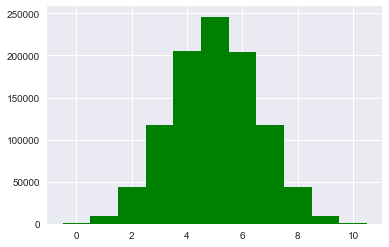

In [55]:
data = coin_toss(Ntrial, ncoin=Ncoin)
(mu, sigma) = norm.fit(data)
print("mu", mu, "sigma", sigma)

plt.clf()
nbins = Ncoin + 1
n, bins, patches = plt.hist(data, range(0, 12), align="left", normed=0, facecolor='green')
print(bins, len(bins), bins[0], bins[1], bins[-2])
bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0],
               stop=bins[-2]+bin_size,num=nbins,endpoint=True)
x = np.linspace(0, 10, 11)
print(x, len(x))
y = n
print(y, len(y))

In [56]:
def Gaussian(x, *p):
    N, mean, std = p
    return N * np.exp( - (x - mean) ** 2 / 2 / std ** 2)

In [57]:
p0 = [Ntrial/10, Ncoin, Ncoin]
popt, pcov = curve_fit(Gaussian, x, y, p0=p0)
print(popt, np.sqrt(pcov.diagonal()))
print("mean", popt[1],  "error", np.sqrt(pcov.diagonal())[1])

[  2.47332730e+05   5.00031870e+00  -1.62338903e+00] [  1.15511893e+03   8.75437264e-03   8.75552264e-03]
mean 5.00031870122 error 0.00875437264287


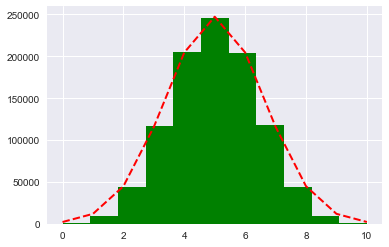

mean 5.00031870122 error 0.00875437264287


In [58]:
# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma) * Ntrial
plt.hist(data, nbins, normed=0, facecolor='green')
y_fit = Gaussian(x, *popt)
l = plt.plot(x, y_fit, 'r--', linewidth=2)
plt.show()
print("mean", popt[1],  "error", np.sqrt(pcov.diagonal())[1])

## Do random walk now

In [60]:
def random_walk(ntrial, ndim=1):
    steps = np.array([-(1/ndim) ** 0.5, (1/ndim) ** 0.5])
    result = np.array(np.zeros([ntrial, ndim]))
    for i in np.arange(ntrial):
        result[i, :] =  np.random.choice(steps, ndim) + result[i - 1, :]
    return result

In [94]:
N_drunks = 100
N_steps = 4000
N_dim = 2

total_walk = np.array(np.zeros(N_steps))

for i in np.arange(N_drunks):
    walks = random_walk(N_steps, N_dim)
    walks_size = LA.norm(walks, axis=(1,))
    total_walk += walks_size

total_walk = total_walk / N_drunks

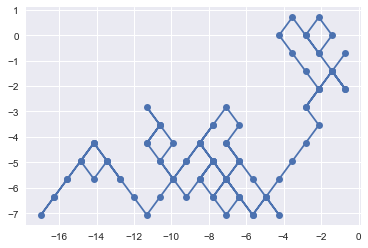

In [95]:
plt.plot(walks[:100, 0],walks[:100, 1], '-o')

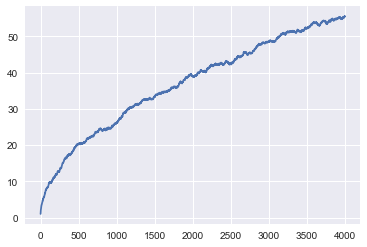

In [96]:
plt.clf()
plt.plot(np.arange(N_steps), total_walk)

In [97]:
def distance(x, *p):
    a, b = p
    return a * np.sqrt(x) + b * 0

In [98]:
p1 = [1, 1]
w_par, w_cov = curve_fit(distance, np.arange(N_steps), total_walk, p0=p1)
print(w_par)
print("coefficient", w_par[0])

[ 0.87703242  1.        ]
coefficient 0.87703242449


/Users/renormalization/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


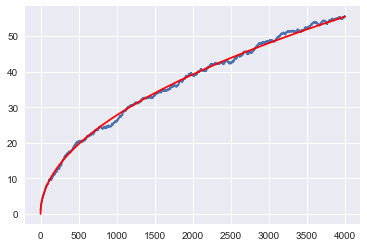

In [99]:
plt.clf()
plt.plot(np.arange(N_steps), total_walk)
plt.plot(np.arange(N_steps), distance(np.arange(N_steps), *w_par), "r")

In [100]:
print(w_par[0], np.pi)

0.87703242449 3.141592653589793


See
https://math.stackexchange.com/questions/103142/expected-value-of-random-walk
http://mathworld.wolfram.com/RandomWalk1-Dimensional.html

In [101]:
from scipy.special import gamma

In [102]:
gamma((N_dim + 1)/2)/gamma((N_dim)/2) * ((2/N_dim) ** 0.5)

0.88622692545275794

In [103]:
1 / (gamma((1+ 1)/2)/gamma((1)/2) ** 2) ## 1D this is Pi

3.1415926535897927